# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Weather API
https://openweathermap.org/api

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Separate empty list to capture the latitude and longitude along with the city.
lat_lng_city = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
        # Appending city, latitude, longitude into lat_lng_city
        lat_lng_city.append([city, lat_lng[0], lat_lng[1]])

# Print the city count to confirm sufficient count
print(len(cities))

# Testing to see what the randomly generate cities are in cities list
#pprint(lat_lng_city)
#cities

616


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# API call by city name

record_counter = 0
set_counter = 1
skip_counter = 0
weather_list = []

start_time = time.time()    # start timer

print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

#for city in range(100):
for city in range(len(cities)):
    if (record_counter > 0) and ((record_counter % 50) == 0):
        print("Taking break", time.time())
        time.sleep(60)
        set_counter += 1
        record_counter += 1
    else:
        #api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
        request = requests.get(f"https://api.openweathermap.org/data/2.5/weather?q={cities[city]}&appid={weather_api_key}")
        response = request.json()
        #pprint(response)
        try:
            weather_list.append({"City": cities[city],
                                 "City_name": response["name"],
                                 "Lat": response["coord"]["lat"],
                                 "Lng": response["coord"]["lon"],
                                 "Max Temp": response["main"]["temp_max"],
                                 "Humidity": response["main"]["humidity"],
                                 "Cloudiness": response["clouds"]["all"],
                                 "Wind Speed": response["wind"]["speed"],
                                 "Country": response["sys"]["country"],
                                 "Date": response["dt"]})
            print(f"Processing Record {record_counter:03d} of Set {set_counter:02d} | {cities[city]}")
            record_counter += 1
        except:  #NameError as error:
            #print(error, "This Error")
            print(f"City not found.  Skipping... {skip_counter}")
            skip_counter += 1

end_time = time.time()    # end timer
time_diff = end_time - start_time    # time difference

# Prints runtime
print(f"start time: {start_time}; end time: {end_time}; time diff: {time_diff}")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 000 of Set 01 | atuona
City not found.  Skipping... 0
Processing Record 001 of Set 01 | puerto ayora
Processing Record 002 of Set 01 | punta arenas
Processing Record 003 of Set 01 | birigui
Processing Record 004 of Set 01 | rikitea
City not found.  Skipping... 1
Processing Record 005 of Set 01 | mataura
Processing Record 006 of Set 01 | busselton
Processing Record 007 of Set 01 | inuvik
Processing Record 008 of Set 01 | jamestown
Processing Record 009 of Set 01 | svetlogorsk
Processing Record 010 of Set 01 | butaritari
Processing Record 011 of Set 01 | fallon
Processing Record 012 of Set 01 | bambous virieux
Processing Record 013 of Set 01 | aswan
Processing Record 014 of Set 01 | hermanus
Processing Record 015 of Set 01 | iqaluit
Processing Record 016 of Set 01 | kindia
Processing Record 017 of Set 01 | cherskiy
Processing Record 018 of Set 01 | vaini
Processing Record 019 of Set 01 

City not found.  Skipping... 20
Processing Record 174 of Set 04 | portales
Processing Record 175 of Set 04 | tasiilaq
Processing Record 176 of Set 04 | shimoda
Processing Record 177 of Set 04 | denia
Processing Record 178 of Set 04 | taos
Processing Record 179 of Set 04 | akyab
Processing Record 180 of Set 04 | sigli
Processing Record 181 of Set 04 | san cristobal
Processing Record 182 of Set 04 | thompson
Processing Record 183 of Set 04 | balkhash
Processing Record 184 of Set 04 | nishihara
Processing Record 185 of Set 04 | katherine
Processing Record 186 of Set 04 | lebu
Processing Record 187 of Set 04 | barrow
City not found.  Skipping... 21
Processing Record 188 of Set 04 | codrington
City not found.  Skipping... 22
Processing Record 189 of Set 04 | sedkyrkeshch
Processing Record 190 of Set 04 | hovd
Processing Record 191 of Set 04 | acapulco
Processing Record 192 of Set 04 | agucadoura
Processing Record 193 of Set 04 | wageningen
Processing Record 194 of Set 04 | caravelas
City no

Processing Record 353 of Set 08 | boa vista
Processing Record 354 of Set 08 | port lincoln
Processing Record 355 of Set 08 | ronne
Processing Record 356 of Set 08 | haines junction
Processing Record 357 of Set 08 | makakilo city
Processing Record 358 of Set 08 | yantal
Processing Record 359 of Set 08 | vung tau
Processing Record 360 of Set 08 | puerto quijarro
Processing Record 361 of Set 08 | saravan
Processing Record 362 of Set 08 | alice springs
Processing Record 363 of Set 08 | taoudenni
Processing Record 364 of Set 08 | chokurdakh
Processing Record 365 of Set 08 | matadi
Processing Record 366 of Set 08 | tarata
Processing Record 367 of Set 08 | tianpeng
Processing Record 368 of Set 08 | vahan
Processing Record 369 of Set 08 | mehamn
Processing Record 370 of Set 08 | guilin
Processing Record 371 of Set 08 | rudnogorsk
Processing Record 372 of Set 08 | ascope
Processing Record 373 of Set 08 | zhigansk
Processing Record 374 of Set 08 | angoche
Processing Record 375 of Set 08 | gushik

Processing Record 537 of Set 11 | gisors
Processing Record 538 of Set 11 | sao joao da barra
Processing Record 539 of Set 11 | bressuire
Processing Record 540 of Set 11 | esfarayen
Processing Record 541 of Set 11 | kifri
Processing Record 542 of Set 11 | wenshang
Processing Record 543 of Set 11 | port keats
Processing Record 544 of Set 11 | poum
Processing Record 545 of Set 11 | imbituba
Processing Record 546 of Set 11 | mier
Processing Record 547 of Set 11 | farafangana
City not found.  Skipping... 46
City not found.  Skipping... 47
Processing Record 548 of Set 11 | chapleau
Processing Record 549 of Set 11 | gilbues
Taking break 1644523164.0255165
Processing Record 551 of Set 12 | sisimiut
Processing Record 552 of Set 12 | beloha
Processing Record 553 of Set 12 | fort morgan
Processing Record 554 of Set 12 | novoagansk
Processing Record 555 of Set 12 | vanimo
Processing Record 556 of Set 12 | sharlyk
Processing Record 557 of Set 12 | ambon
Processing Record 558 of Set 12 | mazarron
Pr

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Create a pdf of the weather data
weather_df = pd.DataFrame(weather_list)
clean_weather_df = weather_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
clean_weather_df.head()

In [15]:
clean_weather_df.describe()

# Writes the df to a csv file for the purpose of making the data easily accessible
clean_weather_df.to_csv("resource/clean_weather_data.csv")

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,21.151147,15.580499,284.121421,70.374101,57.910072,3.659964,1.644523e+09
std,33.381627,87.357430,17.433826,22.536624,40.641600,2.559249,3.029264e+02
min,-54.800000,-175.200000,231.650000,8.000000,0.000000,0.000000,1.644522e+09
25%,-6.444075,-60.679975,274.827500,57.000000,10.000000,1.732500,1.644522e+09
50%,26.687700,20.078800,289.620000,76.000000,75.000000,3.130000,1.644523e+09
75%,47.881775,83.495850,298.025000,88.000000,100.000000,4.960000,1.644523e+09
max,78.218600,179.316700,311.510000,100.000000,100.000000,13.890000,1.644523e+09


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [122]:
# Read in clean_weather_data.csv
weather_data_filepath = "resource/clean_weather_data.csv"
weather_data = pd.read_csv(weather_data_filepath, index_col = 0)
weather_data

humidity_over_100 = None

# Check to see if there are any cities that have Humidity over 100%
if weather_data.describe()["Humidity"][7] > 100:
    print("There are data points where humidity is greater than 100%")
    humidity_over_100 = weather_data.loc[(weather_data["Humidity"] > 100), :]
else:
    print("There are no data points where humidity is greater than 100%")
    #weather_data.describe()
    
weather_data.describe()


There are no data points where humidity is greater than 100%


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,21.151147,15.580499,284.121421,70.374101,57.910072,3.659964,1.644523e+09
std,33.381627,87.357430,17.433826,22.536624,40.641600,2.559249,3.029264e+02
min,-54.800000,-175.200000,231.650000,8.000000,0.000000,0.000000,1.644522e+09
25%,-6.444075,-60.679975,274.827500,57.000000,10.000000,1.732500,1.644522e+09
50%,26.687700,20.078800,289.620000,76.000000,75.000000,3.130000,1.644523e+09
75%,47.881775,83.495850,298.025000,88.000000,100.000000,4.960000,1.644523e+09
max,78.218600,179.316700,311.510000,100.000000,100.000000,13.890000,1.644523e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [130]:
if humidity_over_100 != None:
    ind_humidity = humidity_over_100.index
    print("1st")
    print(ind)

In [124]:
#  Get the indices of cities that have humidity over 100%.


In [131]:
if weather_data.describe()["Humidity"][7] > 100:
    print("There are data points where humidity is greater than 100%")
    humidity_over_100 = weather_data.loc[(weather_data["Humidity"] > 100), :]
    clean_city_data = weather_data.drop(index = humidity_over_100.index, inplace = False)
else:
    print("There are no data points where humidity is greater than 100%")
    #weather_data.describe()

There are no data points where humidity is greater than 100%


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

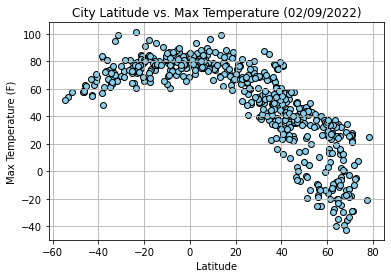

In [132]:
fahren = [(((K - 273.15) * 1.8) + 32) for K in weather_data["Max Temp"]]

plt.scatter(weather_data["Lat"], fahren, marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("output/LatVsMaxTemp.png")

plt.show()

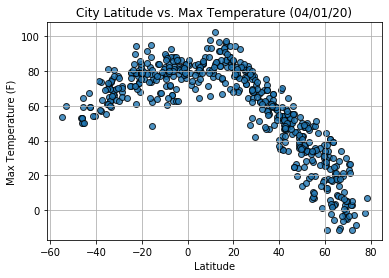

## Latitude vs. Humidity Plot

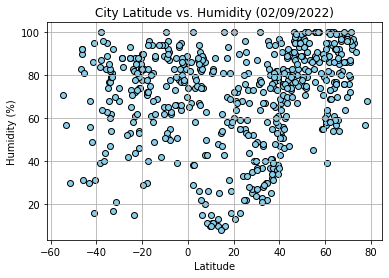

In [133]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Humidity (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("output/LatVsHumidity.png")

plt.show()

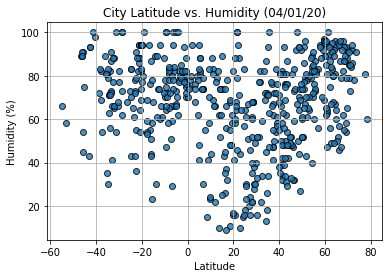

## Latitude vs. Cloudiness Plot

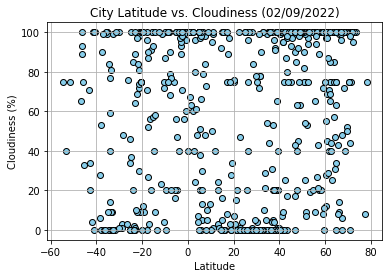

In [134]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Cloudiness (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("output/LatVsCloudiness.png")

plt.show()

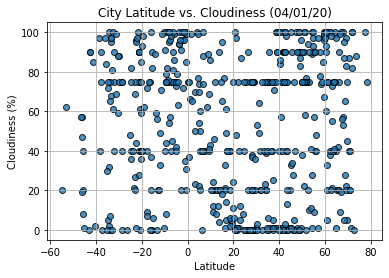

## Latitude vs. Wind Speed Plot

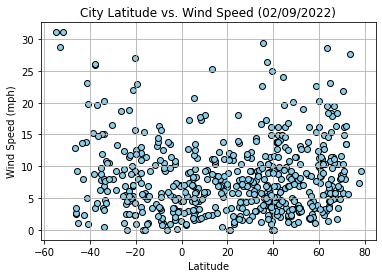

In [135]:
mph = [(meter_second * 2.2369) for meter_second in weather_data["Wind Speed"]]

plt.scatter(weather_data["Lat"], mph, marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Wind Speed (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output/LatVsWindSpeed.png")

plt.show()

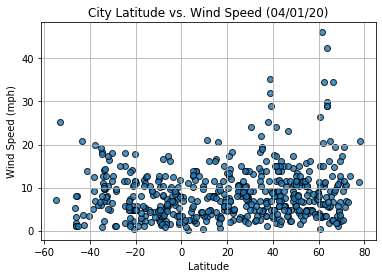

## Linear Regression

In [49]:
# a line of 0 degrees latitude divides the Earth into the Northern and Southern hemispheres

north_hemi = weather_data.loc[(weather_data["Lat"] >= 0), :]
south_hemi = weather_data.loc[(weather_data["Lat"] < 0), :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8387792828897267


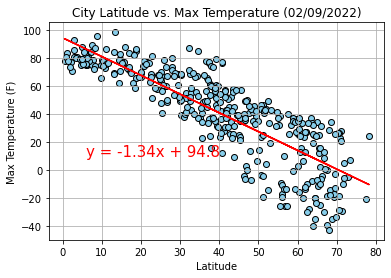

In [136]:
fahren = [(((K - 273.15) * 1.8) + 32) for K in north_hemi["Max Temp"]]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi["Lat"], fahren)
regress_values = (north_hemi["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_hemi["Lat"], fahren, marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
                                                           
plt.plot(north_hemi["Lat"], regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize = 15, color = "red")

plt.savefig("output/LatVsMaxTemp_northhemi.png")

plt.show()

The r-value is: 0.46937863826630627


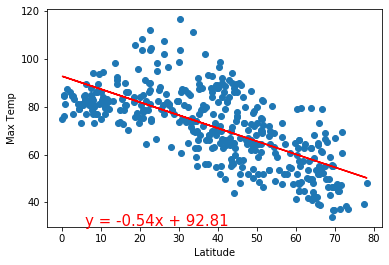

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.558319567817773


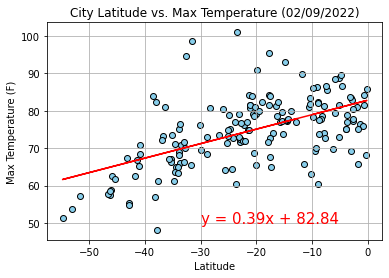

In [137]:
fahren = [(((K - 273.15) * 1.8) + 32) for K in south_hemi["Max Temp"]]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi["Lat"], fahren)
regress_values = (south_hemi["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_hemi["Lat"], fahren, marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.plot(south_hemi["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-30, 50), fontsize = 15, color = "red")

plt.savefig("output/LatVsMaxTemp_southhemi.png")

plt.show()

The r-value is: 0.6082708688906918


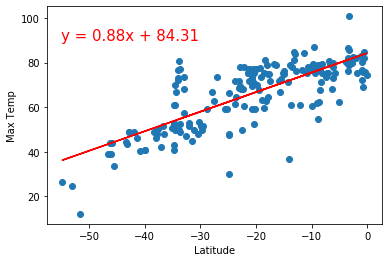

As we plot the graphs max temperatures of the Northern hemisphere and the Southern hemispheres, we see something interesting about the data.  Looking at the temperatures in the Northern hemisphere, we can see that as the latitude increases the temperature decreases.  The linear regression equation backs this up.  When we think about it, the closer to the equator a place is, the hotter it tends to be while the further away a place is from the equator, the less hot it tends to be.

The opposite can be seen in the Southern hemisphere.  As we move towards the equator, the temperature increases.  It can be seen as we see the data points in the scatter plot as well as the positive slope.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.41849691381297377


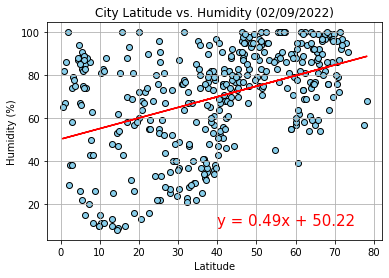

In [138]:
plt.scatter(north_hemi["Lat"], north_hemi["Humidity"], marker = "o", facecolors = "skyblue", edgecolors = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi["Lat"], north_hemi["Humidity"])
regress_values = (north_hemi["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.title("City Latitude vs. Humidity (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.plot(north_hemi["Lat"], regress_values, "r-")
plt.annotate(line_eq, (40, 10), fontsize = 15, color = "red")

plt.savefig("output/LatVsHumidity_northhemi.png")

plt.show()

The r-value is: 0.000543987878808455


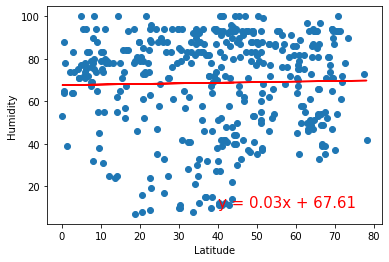

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19677827763684116


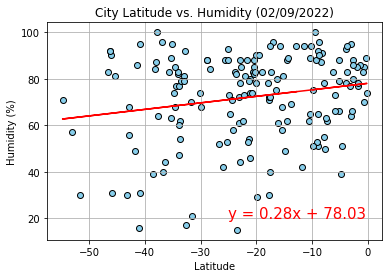

In [139]:
plt.scatter(south_hemi["Lat"], south_hemi["Humidity"], marker = "o", facecolors = "skyblue", edgecolors = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi["Lat"], south_hemi["Humidity"])
regress_values = (south_hemi["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.plot(south_hemi["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 20), fontsize = 15, color = "red")

plt.title("City Latitude vs. Humidity (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("output/LatVsHumidity_southhemi.png")

plt.show()

The r-value is: 0.014985174297345524


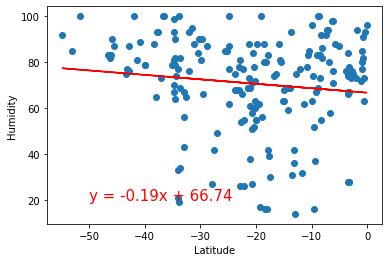

In looking at the latitude vs humidity plots for the Northern hemisphere, we see that as the latitude increases so does the humidity.  What is strange is that the closer a place is to the equator, it tends to be more humid and that the further away it is from the equator it would be more dry and frigid.  What might have happened was that the data points collected were from regions that experienced higher moisture levels (perhaps because of a rainy season during this time) and therefore shows a moderate correlation between the latitude and humidity.  This would need to be further examined.

The Southern hemisphere also shows a slight positive linear regression.  The correlation between latitude and humidity is a weak one with the r value being 0.20.  As can be seen from the scatter plot, there are more data points clustered above 70% humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22680890784215363


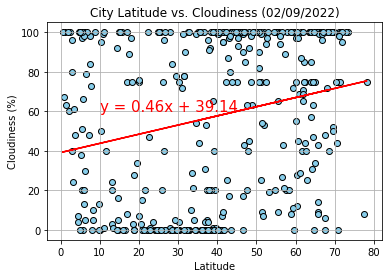

In [140]:
plt.scatter(north_hemi["Lat"], north_hemi["Cloudiness"], marker = "o", facecolors = "skyblue", edgecolors = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi["Lat"], north_hemi["Cloudiness"])
regress_values = (north_hemi["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.plot(north_hemi["Lat"], regress_values, "r-")
plt.annotate(line_eq, (10, 60), fontsize = 15, color = "red")

plt.title("City Latitude vs. Cloudiness (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("output/LatVsCloudiness_northhemi.png")

plt.show()

The r-value is: 0.0020898727664228514


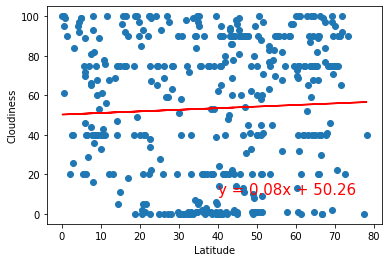

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24763676098072146


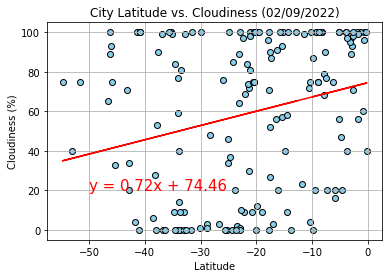

In [141]:
plt.scatter(south_hemi["Lat"], south_hemi["Cloudiness"], marker = "o", facecolors = "skyblue", edgecolors = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi["Lat"], south_hemi["Cloudiness"])
regress_values = (south_hemi["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.plot(south_hemi["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize = 15, color = "red")

plt.title("City Latitude vs. Cloudiness (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("output/LatVsCloudiness_southhemi.png")

plt.show()

The r-value is: 0.0035263772085582894


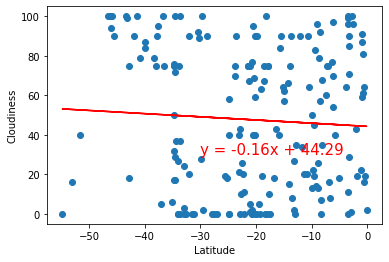

Examining both latitude of the city and the cloudiness for cities in the Northern and Southern hemisphere, there are data points ranging between 0% to 100% cloudiness.  For both Northern and Southern hemisphere the r value is 0.23 and 0.25, respectively.  There's a weak relationship between the cities and the cloudiness in both hemispheres.

There is something interesting in the Northern hemisphere during the time that the data was taken.  From latitude 10 to 45, there is a cluster of cities that saw clear skies during the weather API call.  And also latitude between 30 to 75, there is a cluster of cities that saw 100% cloudy skies during this time.  Further analysis might reveal what region of the Northern hemisphere experienced clear skies and cloudiness on this day.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.16112559839116025


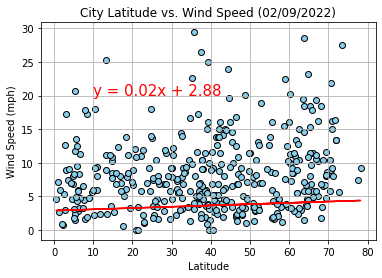

In [142]:
mph = [(meter_second * 2.2369) for meter_second in north_hemi["Wind Speed"]]

plt.scatter(north_hemi["Lat"], mph, marker = "o", facecolors = "skyblue", edgecolors = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi["Lat"], north_hemi["Wind Speed"])
regress_values = (north_hemi["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.plot(north_hemi["Lat"], regress_values, "r-")
plt.annotate(line_eq, (10, 20), fontsize = 15, color = "red")

plt.title("City Latitude vs. Wind Speed (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output/LatVsWindSpeed_northhemi.png")

plt.show()

The r-value is: 0.04019723576144484


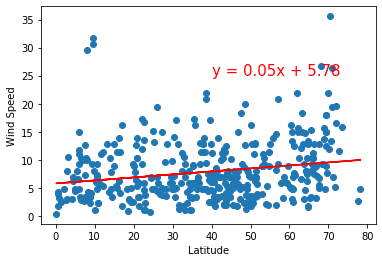

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.34521278500655117


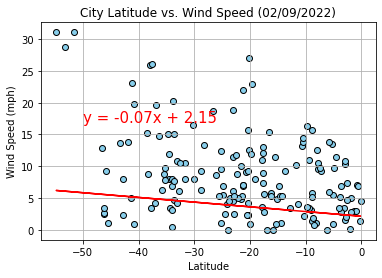

In [143]:
mph = [(meter_second * 2.2369) for meter_second in south_hemi["Wind Speed"]]

plt.scatter(south_hemi["Lat"], mph, marker = "o", facecolors = "skyblue", edgecolors = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi["Lat"], south_hemi["Wind Speed"])
regress_values = (south_hemi["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.plot(south_hemi["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 17), fontsize = 15, color = "red")

plt.title("City Latitude vs. Wind Speed (02/09/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output/LatVsWindSpeed_southhemi.png")

plt.show()

The r-value is: 0.017128274759839232


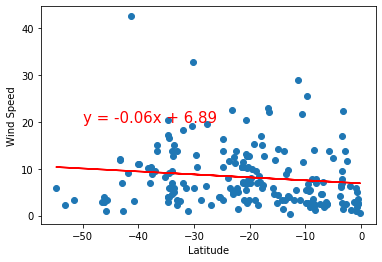

For city latitude vs wind speed in both hemispheres, wind speeds were generally between 0 to 15 mph.  There is a weak correlation between city latitude and wind speed in the Northern hemisphere and a weak and inverse correlation in the Southern hemisphere.  